In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Bill dataset
X = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10])  # Number of people
y = np.array([15, 20, 25, 30, 35, 40, 45, 50, 55])  # Bill amount

In [12]:
# Locally Weighted Regression function
def locally_weighted_regression(test_point, X, y, tau):
    # Calculate the weights
    weights = np.exp(-((X - test_point) ** 2) / (2 * tau ** 2))

    # Calculate the weighted least squares solution
    X_design = np.column_stack((np.ones_like(X), X))
    theta = np.linalg.inv(X_design.T @ (weights[:, None] * X_design)) @ (X_design.T @ (weights[:, None] * y))

    # Predict the value for the test point
    test_point_design = np.array([1, test_point])
    predicted_value = test_point_design @ theta

    return predicted_value

# Set the parameters for Locally Weighted Regression
tau = 0.5  # Bandwidth parameter

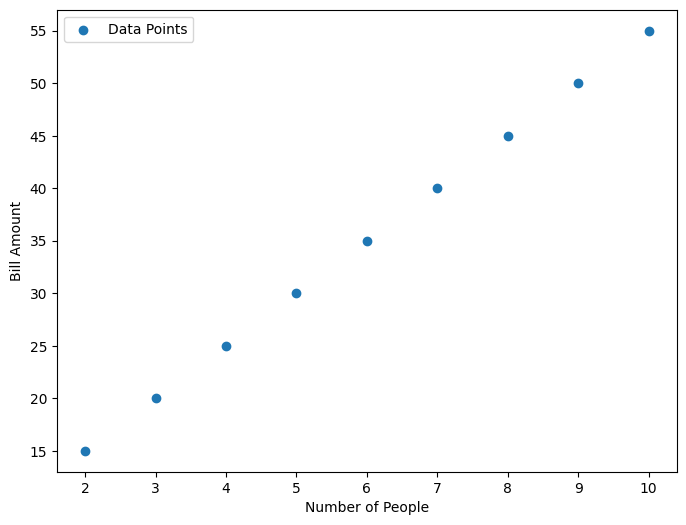

In [18]:
# Perform Locally Weighted Regression for each test point
x_test = np.linspace(np.min(X), np.max(X), 100)
y_pred = []
for test_point in x_test:
    predicted_value = locally_weighted_regression(test_point, X, y, tau)
    y_pred.append(predicted_value)

# Plot the data points and the Locally Weighted Regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Data Points')
# plt.plot(x_test, y_pred, color='red', label='Locally Weighted Regression')
# plt.title('Locally Weighted Regression - Bill')
plt.xlabel('Number of People')
plt.ylabel('Bill Amount')
plt.legend()
plt.show()